In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model

In [2]:
def gradient_descent(x, y, learning_rate):
    slope = intercept = 0
    n = len(x)
    previous_cost = 0
    plt.scatter(x, y, color='red', marker='+', linewidths=5, zorder=9999999)
    iterations = 0
    while True:
        prediction = slope * x + intercept
        plt.plot(x, prediction, color='gray')
        cost = (1 / n) * sum([val**2 for val in (y - prediction)])
        if (math.isclose(cost, previous_cost, rel_tol=1e-20)):
            break;
        delta_slope = -(2 / n) * sum(x * (y - prediction))
        delta_intercept = -(2 / n) * sum(y - prediction)
        slope = slope - learning_rate * delta_slope
        intercept = intercept - learning_rate * delta_intercept
        #print('Cost:', cost, ', Previous Cost:', previous_cost, ', Cost Difference:', abs(cost - previous_cost))
        previous_cost = cost
        iterations += 1
    print('Slope:', slope, ', Intercept:', intercept, ', Cost:', cost, ", Iterations: ", iterations)
    plt.plot(x, prediction, color='black')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/3_gradient_descent/Exercise/test_scores.csv')
df.drop(columns='name', inplace=True)
X = np.array(df['math'])
y = np.array(df['cs'])
df

,math,cs
0,92,98
1,56,68
2,88,81
3,70,80
4,80,83
5,49,52
6,65,66
7,35,30
8,66,68
9,67,73


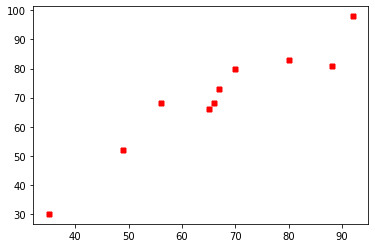

In [4]:
plt.scatter(X, y, color='red', marker='+', linewidths=5, zorder=9999999);

Slope: 1.0177381667793246 , Intercept: 1.9150826134339467 , Cost: 31.604511334602297 , Iterations:  415533


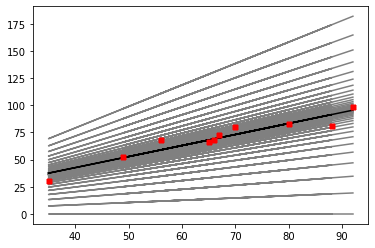

In [5]:
gradient_descent(X, y, 0.0002)

In [6]:
model = linear_model.LinearRegression()
model.fit(df[['math']], df.cs)
print('Slope:', model.coef_, ', Intercept:', model.intercept_)

Slope: [1.01773624] , Intercept: 1.9152193111568891
